# Going on a Random Walk

# Loading Libraries

In [1]:
# Data Manipulation
import pandas as pd
# Numerical Computing
import numpy as np

# Data Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings

In [2]:
# Ignore all warnings
warnings.filterwarnings('ignore')

### Simulating a Random Walk Process

In [4]:
# Setting a random seed
np.random.seed(42)

# Generate a 1000 steps with a normal distribution
steps = np.random.standard_normal(1000)
steps[0] = 0

#
random_walk = np.cumsum(steps)

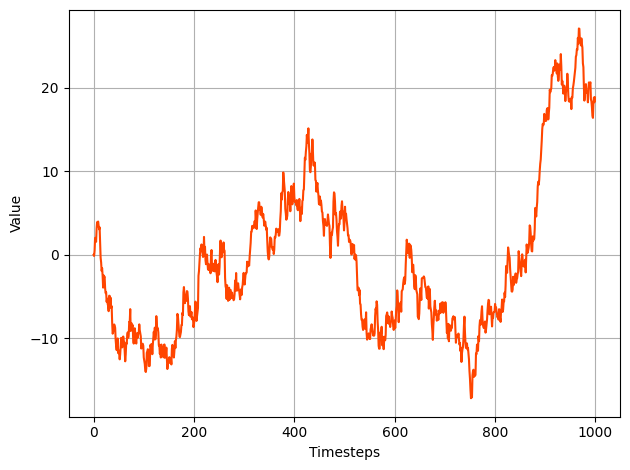

In [7]:
# Let's visualize it

fig , ax = plt.subplots()

ax.plot(random_walk, color='orangered')
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()
plt.grid(True)

### Identifying a Random Walk

#### Testing for Stationarity

In [8]:
# Simulation function
def simulate_process(is_stationary: bool) -> np.array:
    np.random.seed(42)
    process = np.empty(400)
    
    if is_stationary:
        alpha = 0.5
        process[0] = 0
    else:
        alpha = 1
        process[0] = 10
        
    for i in range(400):
        if i+1 < 400:
            process[i+1] = alpha*process[i] + np.random.standard_normal()
        else:
            break
        
    return process

In [9]:
stationary = simulate_process(True)
non_stationary = simulate_process(False)

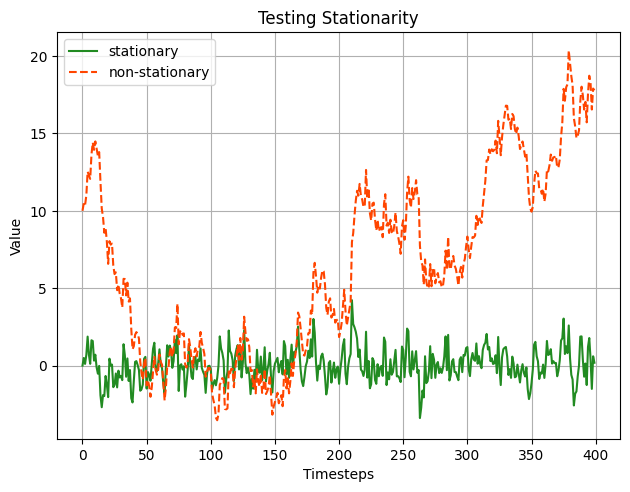

In [22]:
fig, ax = plt.subplots()

ax.plot(stationary, linestyle='-', label='stationary', color='forestgreen')
ax.plot(non_stationary, linestyle='--', label='non-stationary', color='orangered')
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
ax.legend(loc=2)

plt.tight_layout()
plt.title('Testing Stationarity')
plt.grid(True)

In [23]:
# Mean over time function
def mean_over_time(process: np.array) -> np.array:
    mean_func = []
    
    for i in range(len(process)):
        mean_func.append(np.mean(process[:i]))
    
    return mean_func

In [24]:
# Setting a new stationary & non-stationary process
stationary_mean = mean_over_time(stationary)
non_stationary_mean = mean_over_time(non_stationary)

#### Plotting the Mean

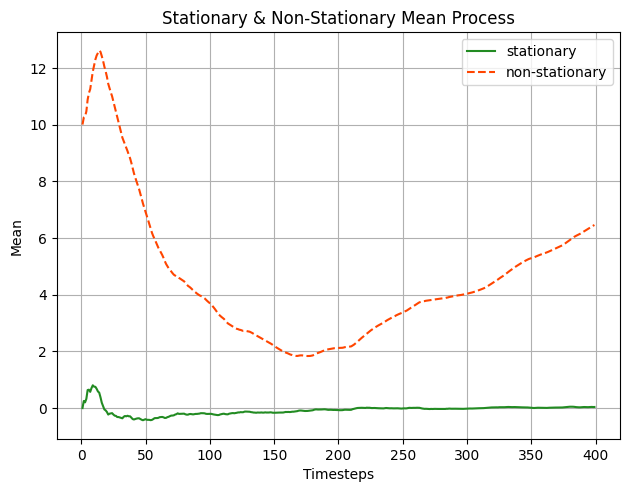

In [25]:
fig, ax = plt.subplots()

ax.plot(stationary_mean, label='stationary', color='forestgreen')
ax.plot(non_stationary_mean, linestyle='--', label='non-stationary', color='orangered')
ax.set_xlabel('Timesteps')
ax.set_ylabel('Mean')
ax.legend(loc=1)

plt.tight_layout()
plt.title('Stationary & Non-Stationary Mean Process')
plt.grid(True)

#### Plotting the Variance

In [26]:
# Setting a Variance function over time
def var_over_time(process: np.array) -> np.array:
    var_func = []
    
    for i in range(len(process)):
        var_func.append(np.var(process[:i]))
    
    return var_func

In [27]:
stationary_var = var_over_time(stationary)
non_stationary_var = var_over_time(non_stationary)

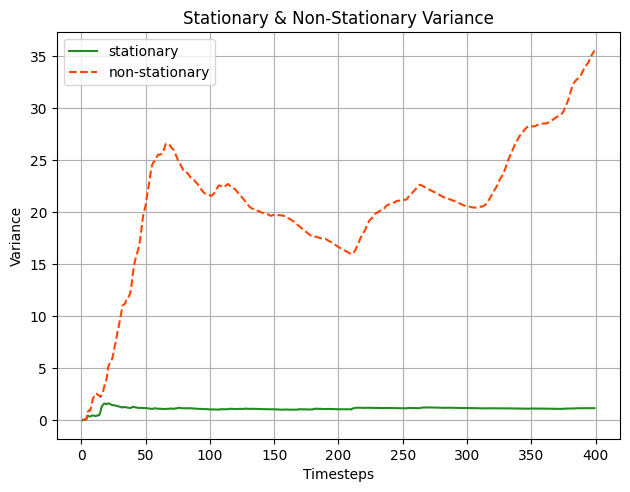

In [28]:
fig, ax = plt.subplots()

ax.plot(stationary_var, label='stationary', color='forestgreen')
ax.plot(non_stationary_var, linestyle='--', label='non-stationary', color='orangered')
ax.set_xlabel('Timesteps')
ax.set_ylabel('Variance')
ax.legend(loc=2)

plt.tight_layout()
plt.title('Stationary & Non-Stationary Variance')
plt.grid(True)

### The Autocorrelation Function

#### Putting all together

In [32]:
# Determining the Stationary state
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

# Passing 'adfuller' through a simulated function
ADF_result = adfuller(random_walk)

# Retrieving ADF stat
print(f'ADF Statistics: {ADF_result[0]}')
# Retrieving p-value
print(f'p-value: {ADF_result[1]}')

ADF Statistics: -0.9659524876918759
p-value: 0.7654789696692579


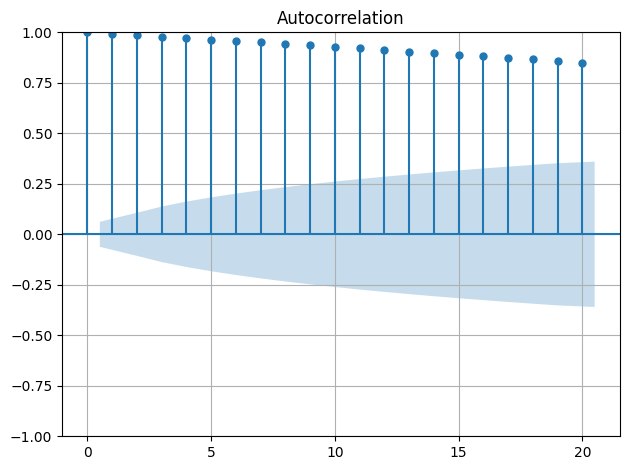

In [52]:
# Plotting the ACF
# plt.rc('lines', color='forestgreen')
plot_acf(random_walk, lags=20);

plt.tight_layout()
plt.grid(True)
# plt.rcdefaults()

In [53]:
# Applying a 1st order differencing
diff_random_walk = np.diff(random_walk, n=1)

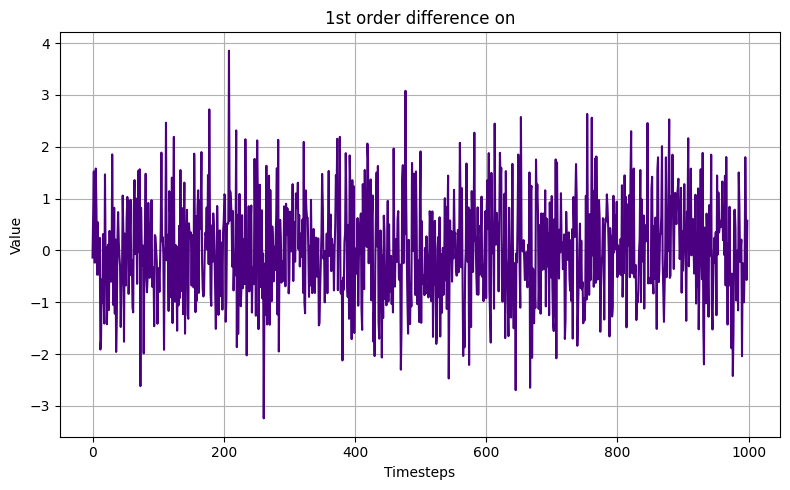

In [54]:
plt.figure(figsize=(8, 5))
plt.plot(diff_random_walk, color='indigo')
plt.title('Differenced Random Walk')
plt.xlabel('Timesteps')
plt.ylabel('Value')
plt.tight_layout()
plt.title('1st order difference on')
plt.grid(True)

In [55]:
# Second test for stationarity
ADF_result = adfuller(diff_random_walk)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -31.7893108575606
p-value: 0.0


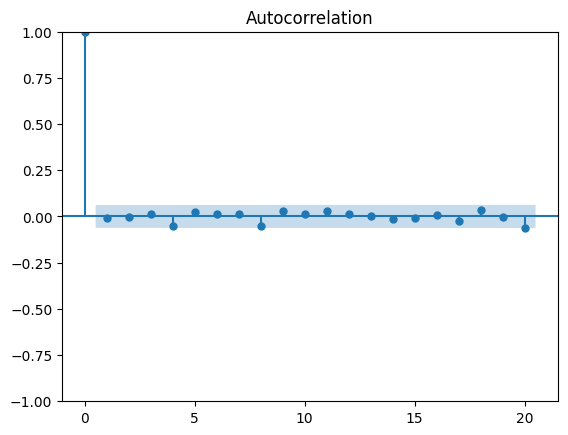

In [59]:
# Plotting outcomes
plot_acf(diff_random_walk, lags=20);

### is GOOGL a random walk?

#### Loading data

In [61]:
df = pd.read_csv('/Users/isisromero/desktop/time_series/data/GOOGL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-27,1292.000000,1294.099976,1265.060059,1270.859985,1270.859985,2209300
1,2020-04-28,1283.199951,1284.760010,1230.380005,1232.589966,1232.589966,4035000
2,2020-04-29,1345.000000,1360.150024,1326.729980,1342.180054,1342.180054,5417900
3,2020-04-30,1331.359985,1350.000000,1321.500000,1346.699951,1346.699951,2792100
4,2020-05-01,1324.089966,1351.430054,1309.660034,1317.319946,1317.319946,2443600


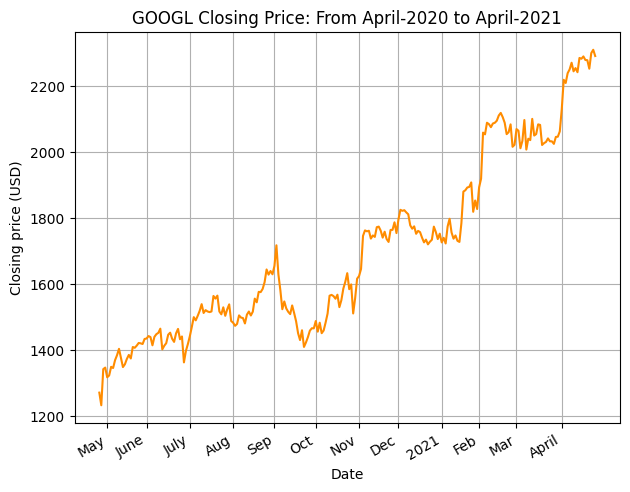

In [66]:
fig, ax = plt.subplots()

ax.plot(df['Date'], df['Close'], color='darkorange')
ax.set_xlabel('Date')
ax.set_ylabel('Closing price (USD)')
plt.xticks(
    [4, 24, 46, 68, 89, 110, 132, 152, 174, 193, 212, 235],
    ['May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', '2021', 'Feb', 'Mar', 'April']
)

fig.autofmt_xdate()
plt.tight_layout()
plt.title('GOOGL Closing Price: From April-2020 to April-2021')
plt.grid(True)

In [67]:
# ADF result
GOOGL_ADF_result = adfuller(df['Close'])

print(f'ADF Statistic: {GOOGL_ADF_result[0]}')
print(f'p-value: {GOOGL_ADF_result[1]}')

ADF Statistic: 0.1602504866477152
p-value: 0.9699419435913058


In [68]:
# 1st Difference order on model
diff_close = np.diff(df['Close'], n=1)

In [69]:
GOOGL_diff_ADF_result = adfuller(diff_close)

print(f'ADF Statistic: {GOOGL_diff_ADF_result[0]}')
print(f'p-value: {GOOGL_diff_ADF_result[1]}')

ADF Statistic: -5.30343970429522
p-value: 5.386530961454919e-06


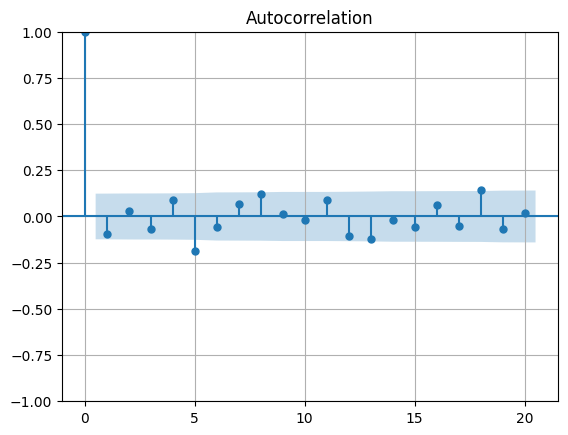

In [72]:
# Plotting autocorrelation
plot_acf(diff_close, lags=20);

plt.grid(True)

### Forecasting a Random Walk

#### Forecasting on a Long Horizon
##### 1. Assigning Random Walk to a Data Frame
##### 2. Split procedure in Train & Test sets

In [73]:
# Random walk on DataFrame
df = pd.DataFrame({'value': random_walk})

# Train set - at 80%
train = df[:800]
# Test set - at 20%
test = df[800:]

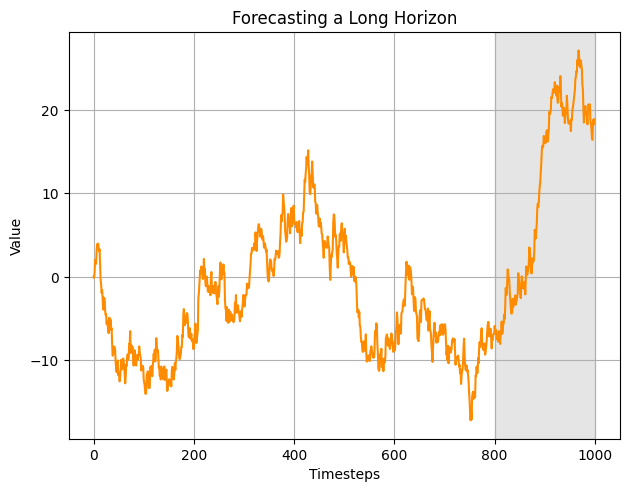

In [74]:
# Let's plotting out
fig, ax = plt.subplots()

ax.plot(random_walk, color='darkorange')
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
ax.axvspan(800, 1000, color='#808080', alpha=0.2)

plt.tight_layout()
plt.title('Forecasting a Long Horizon')
plt.grid(True)

In [75]:
# Using a Naïve Forecast Method

# Historical Mean
mean = np.mean(train.value)

test.loc[:, 'pred_mean'] = mean

test.head()

,value,pred_mean
800,-5.876664,-3.677206
801,-6.392708,-3.677206
802,-6.296588,-3.677206
803,-6.758863,-3.677206
804,-7.193359,-3.677206


In [76]:
# A possible baseline to work on

last_value = train.iloc[-1].value

test.loc[:, 'pred_last'] = last_value

test.head()

,value,pred_mean,pred_last
800,-5.876664,-3.677206,-6.814947
801,-6.392708,-3.677206,-6.814947
802,-6.296588,-3.677206,-6.814947
803,-6.758863,-3.677206,-6.814947
804,-7.193359,-3.677206,-6.814947


In [79]:
# Change in x-axis
deltaX = 800 - 1
# Difference between the last and initial value
deltaY = last_value - 0

drift = deltaY / deltaX
print(drift)

-0.008529346056640632


In [81]:
# Timesteps range
x_vals = np.arange(801, 1001, 1)

# Multiplying by drift
pred_drift = drift * x_vals

#Assigning value to pred_drift
test.loc[:, 'pred_drift'] = pred_drift

test.head()

,value,pred_mean,pred_last,pred_drift
800,-5.876664,-3.677206,-6.814947,-6.832006
801,-6.392708,-3.677206,-6.814947,-6.840536
802,-6.296588,-3.677206,-6.814947,-6.849065
803,-6.758863,-3.677206,-6.814947,-6.857594
804,-7.193359,-3.677206,-6.814947,-6.866124


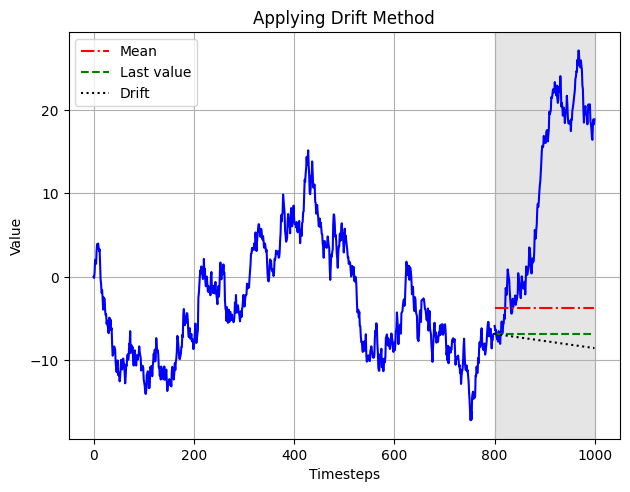

In [83]:
fig, ax = plt.subplots()

ax.plot(train.value, 'b-')
ax.plot(test['value'], 'b-')
ax.plot(test['pred_mean'], 'r-.', label='Mean')
ax.plot(test['pred_last'], 'g--', label='Last value')
ax.plot(test['pred_drift'], 'k:', label='Drift')

ax.axvspan(800, 1000, color='#808080', alpha=0.2)
ax.legend(loc=2)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()
plt.title('Applying Drift Method')
plt.grid(True)

#### Getting Forecast Mean Squared Error (MSE)

In [84]:
from sklearn.metrics import mean_squared_error

mse_mean = mean_squared_error(test['value'], test['pred_mean'])
mse_last = mean_squared_error(test['value'], test['pred_last'])
mse_drift = mean_squared_error(test['value'], test['pred_drift'])

print(mse_mean, mse_last, mse_drift)

326.50277395297474 425.1726033055617 466.2172769077409


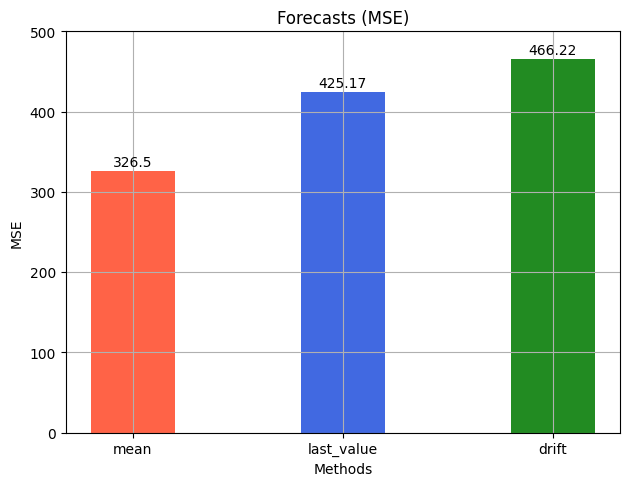

In [85]:
fig, ax = plt.subplots()

x = ['mean', 'last_value', 'drift']
y = [mse_mean, mse_last, mse_drift]

ax.bar(x, y, width=0.4, color=['tomato', 'royalblue', 'forestgreen'])
ax.set_xlabel('Methods')
ax.set_ylabel('MSE')
ax.set_ylim(0, 500)

for index, value in enumerate(y):
    plt.text(x=index, y=value+5, s=str(round(value, 2)), ha='center')

plt.tight_layout()
plt.title('Forecasts (MSE)')
plt.grid(True)

#### Forecasting The Next Timestep

##### Shifting the DataFrame

In [86]:
df_shift = df.shift(periods=1)
df_shift.head()

,value
0,NaN
1,0.000000
2,-0.138264
3,0.509424
4,2.032454


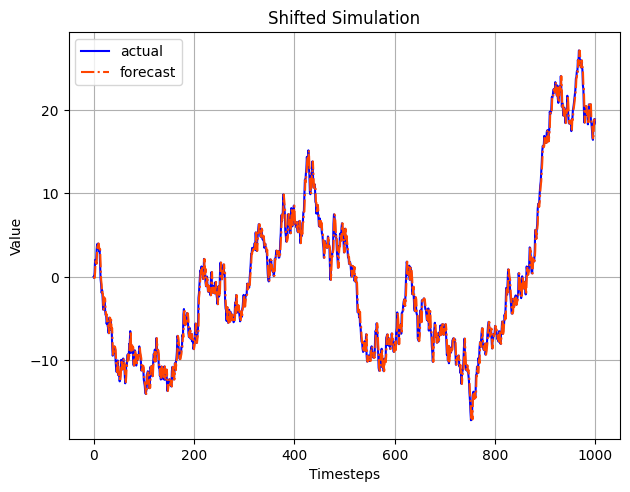

In [94]:
fig, ax = plt.subplots()

ax.plot(df, '-', label='actual', color='blue')
ax.plot(df_shift, '-.', label='forecast', color='orangered')

ax.legend(loc=2)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()
plt.title('Shifted Simulation')
plt.grid(True)

In [95]:
# Calculating the MSE on Test set
mse_one_step = mean_squared_error(test['value'], df_shift[800:])

mse_one_step

0.9256876651440581